# Numerical Integration

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Flipping a Fair Coin 

We assume that we flip a coin $N$ times and observe that $n$ of these are heads.

In [2]:
N = 6
n = 2

We can write a function for the likelihood, $P(n|p,N)$, that depends on $p$, $n$ and $N$.

\begin{equation}
P(n|p,N) = \frac{N!}{n!\left(N-n\right)!} p^n (1-p)^{N-n} \\
\end{equation}

In [3]:
def likelihood(n, p, N):
    return np.math.factorial(N) / np.math.factorial(n) / np.math.factorial(N-n) * np.power(p, n) * np.power(1.0 - p, N-n)

We will use a discrete distribution for our prior belief about $p$. We will assume 11 possible values ranging from 0 to 1.

In [4]:
STEPS = 11

p = np.linspace(0, 1, STEPS)

prior = np.ones(STEPS)

prior /= np.sum(prior)

We can plot our prior beliefs.

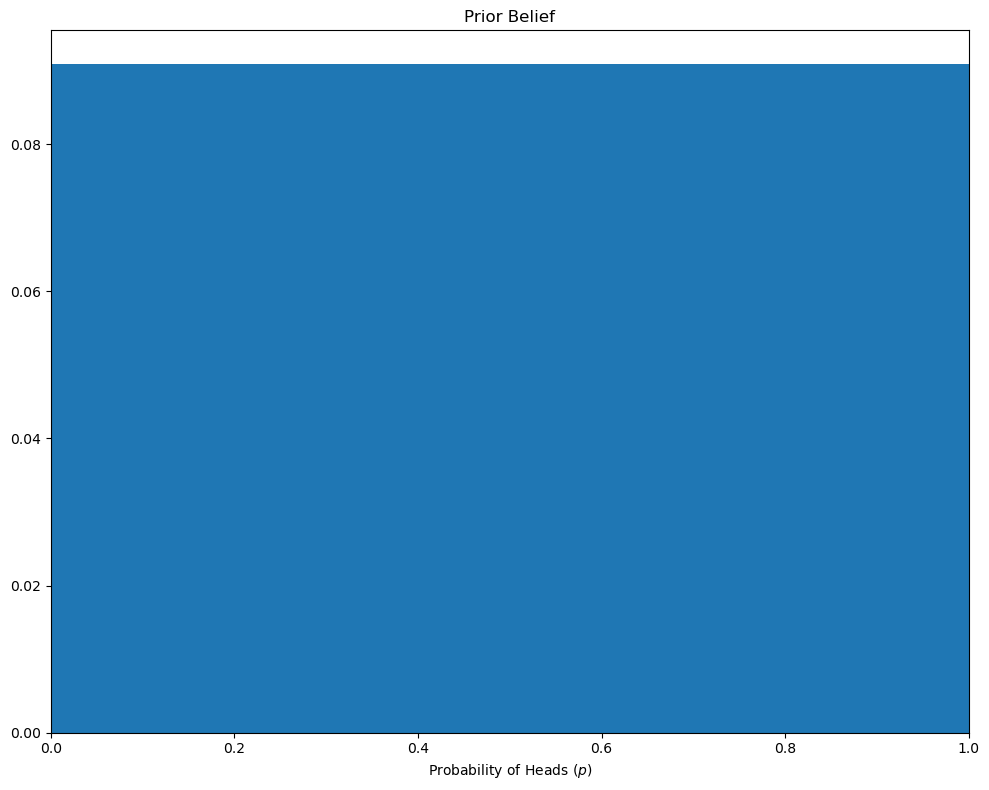

In [5]:
plt.figure(figsize=(10, 8))

BAR_WIDTH = 1/(STEPS - 1)

plt.bar(p, height=prior, width=BAR_WIDTH)

plt.xlim(0, 1)
plt.title("Prior Belief")
plt.xlabel("Probability of Heads ($p$)")

plt.tight_layout()

We can then use Bayes rule to calculate our posterior belief.

\begin{equation}
P(p|n,N) = \frac{P(n|p,N)P(p)}{\sum_{p} P(n|p,N)P(p)}
\end{equation}

In [6]:
posterior = likelihood(n, p, N) * prior

posterior /= np.sum(posterior)

We can plot our posterior beliefs.

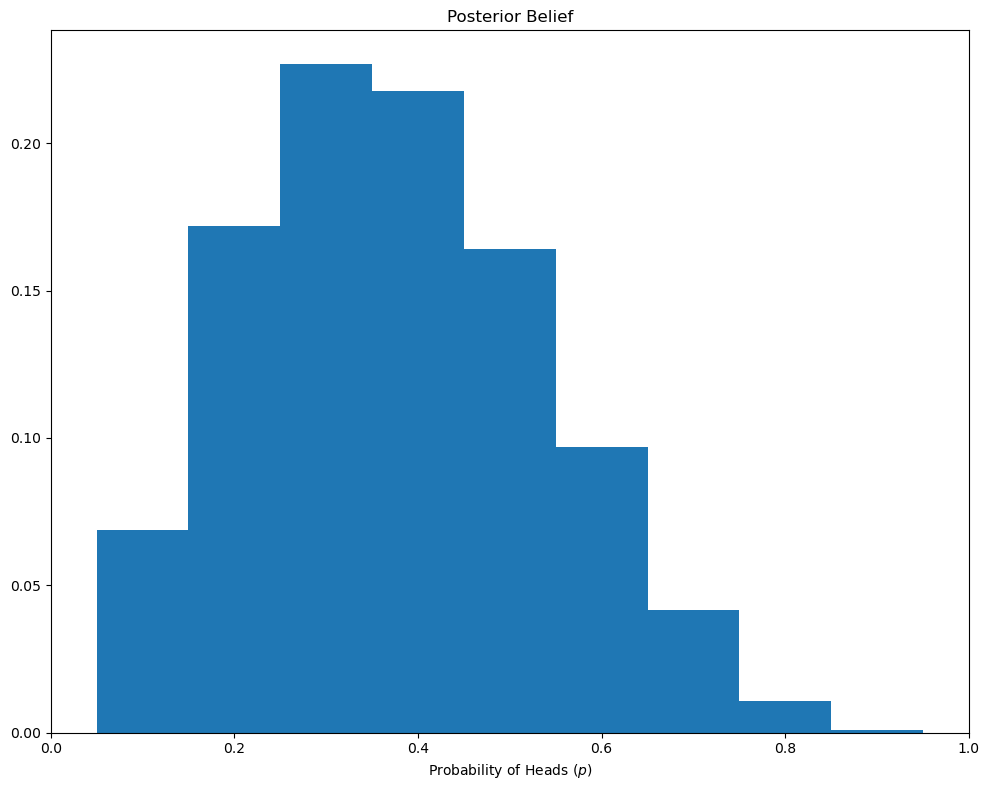

In [7]:
plt.figure(figsize=(10, 8))
plt.bar(p, height=posterior, width=BAR_WIDTH)

plt.xlim(0, 1)
plt.title("Posterior Belief")
plt.xlabel("Probability of Heads ($p$)")

plt.tight_layout()

### More Coin Flips

We now flip the coin two more times and see two more heads. Rather than starting from our initial prior. We can use our posterior in another iteration of Bayes rule.

In [8]:
N = 2
n = 2

posterior = likelihood(n, p, N) * posterior

posterior /= np.sum(posterior)

We can again plot our updated posterior beliefs.

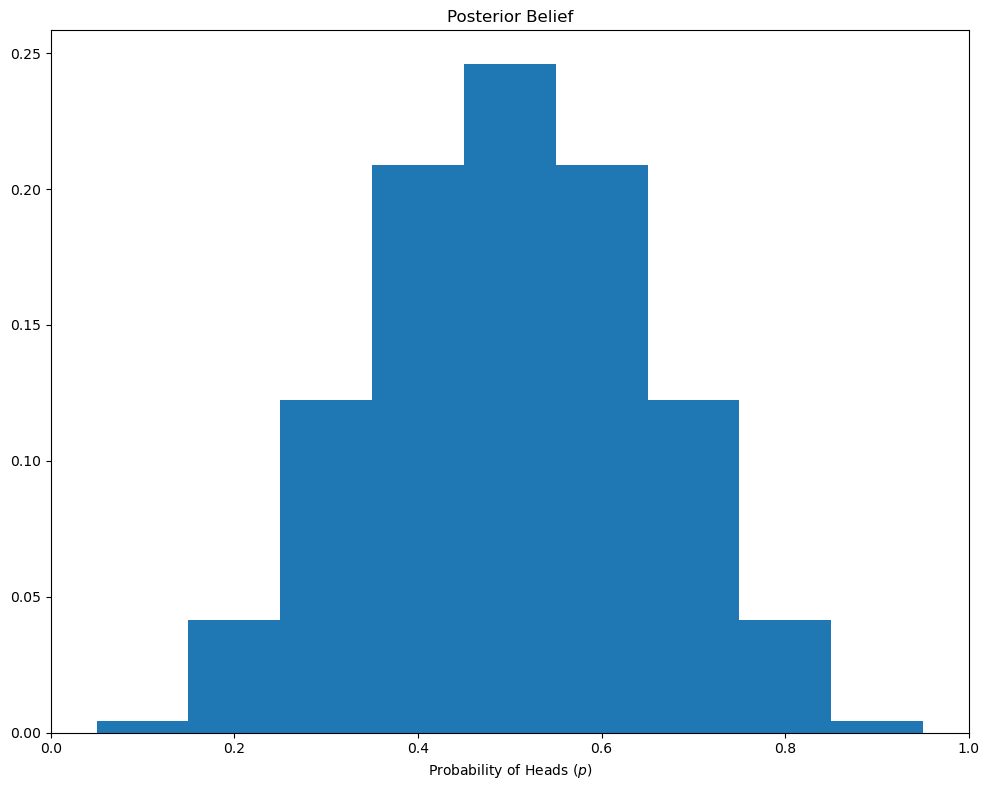

In [9]:
plt.figure(figsize=(10, 8))
plt.bar(p, height=posterior, width=BAR_WIDTH)

plt.xlim(0, 1)
plt.title("Posterior Belief")
plt.xlabel("Probability of Heads ($p$)")

plt.tight_layout()